## **BIBLIOTECAS**

In [ ]:
!pip install investpy

In [8]:
import investpy as inv

In [9]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

##**Fundos de Investimento**

In [10]:
fundos_br = inv.get_funds_list(country='brazil')

In [ ]:
fundos_br

Quantidade de Fundos

In [12]:
len(fundos_br)

5200

Alguns Fundos

In [13]:
fundos_br[:5]

['Fundo De Investimento Multimercado Bordeaux Iv Crédito Privado Investimento No Exterior',
 'Cshg Warrior V Fundo De Investimento Multimercado - Crédito Privado Investimento No Exterior',
 'A3 Viking Fi Em Quotas De Fi Multimercado Crédito Privado Investimento No Exterior',
 'Bb Espelho Multimercado Lp J. Safra Absoluto 30 Private Fic Fi',
 'Ctm Hedge Fundo De Investimento Multimercado - Longo Prazo']

Escolhendo um Fundo

In [15]:
pesq = inv.search_funds(by='name', value='Alaska Black')

In [16]:
pesq

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P0000U9BK,Alaska Investimentos LTDA.,BRSKP7CTF008,other,BRL,NaN
1,brazil,Alaska Black Master Fundo De Investimento Em A...,0P0000U9BJ,Alaska Investimentos LTDA.,BRSKI1CTF000,other,BRL,NaN
2,brazil,Alaska Black Fundo De Investimento Em Cotas De...,0P00019LLR,Alaska Investimentos LTDA.,BRALK5CTF006,equity,BRL,NaN
3,brazil,Alaska Black Institucional Fundo De Investimen...,0P00019X6E,Alaska Investimentos LTDA.,BRASK4CTF002,equity,BRL,NaN
4,brazil,Alfa Alaska Black Institucional - Fundo De Inv...,0P0001CF6A,Banco Alfa Investimentos SA,BRLSK1CTF005,equity,BRL,NaN


In [20]:
pesq['name'][1]

'Alaska Black Master Fundo De Investimento Em Ações - Bdr Nível I'

In [21]:
fundo = 'Alaska Black Master Fundo De Investimento Em Ações - Bdr Nível I'

In [23]:
alaska = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='19/02/2021')['Close']
alaska

Date
2010-09-20    1.016
2010-09-21    1.008
2010-09-22    1.020
2010-09-23    1.032
2010-09-24    1.029
              ...  
2021-02-09    4.588
2021-02-10    4.482
2021-02-11    4.517
2021-02-12    4.572
2021-02-17    4.593
Name: Close, Length: 2599, dtype: float64

Retorno do Fundo ao longo do tempo

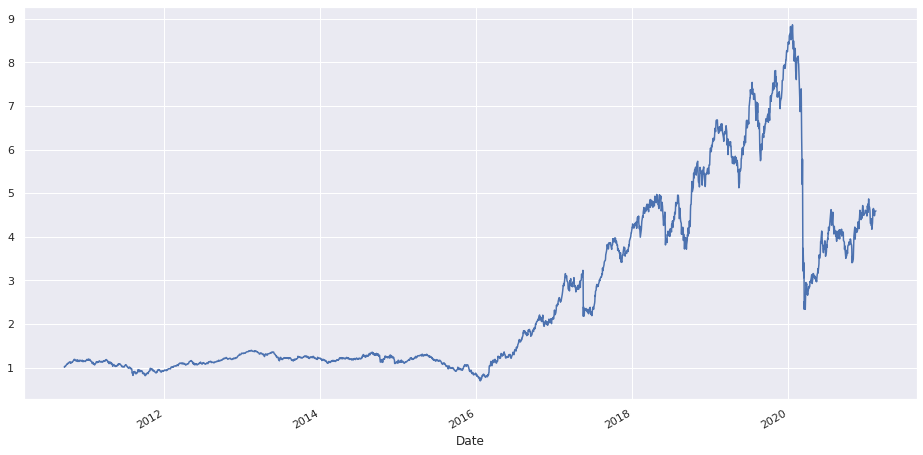

In [26]:
alaska.plot();

######Escolhendo mais um fundo

In [27]:
pesq2 = inv.search_funds(by='name', value='ip part')
pesq2

,country,name,symbol,issuer,isin,asset_class,currency,underlying
0,brazil,Ip Participações Master Fundo De Investimento ...,0P0000U6BB,Investidor Profissional Gestão de Recursos Ltda,BRIPP5CTF009,equity,BRL,NaN
1,brazil,Ip Participações Ipg Fundo De Investimento Em ...,0P0000U6PB,Investidor Profissional Gestão de Recursos Ltda,BRORM2CTF009,equity,BRL,NaN
2,brazil,Ip Participações Fundo De Investimento Em Cota...,0P0000U6B9,Investidor Profissional Gestão de Recursos Ltda,BRIPPTCTF007,equity,BRL,NaN


In [28]:
pesq2['name'][2]

'Ip Participações Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Bdr Nível I'

In [29]:
fundo = 'Ip Participações Fundo De Investimento Em Cotas De Fundos De Investimento Em Ações Bdr Nível I'

In [ ]:
ip = inv.get_fund_historical_data(fundo, country='brazil', from_date='01/01/1900', to_date='19/02/2021')['Close']
ip

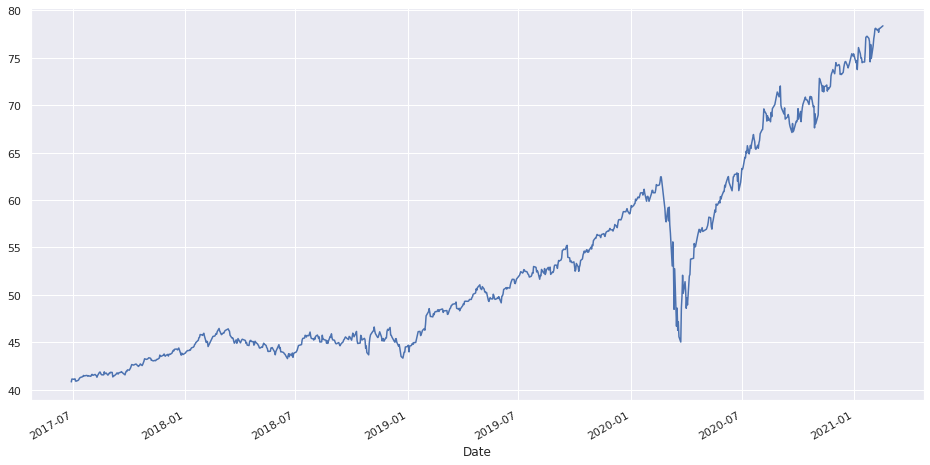

In [31]:
ip.plot();

#### Escolhendo um ETF (SMALL11)

In [32]:
inv.get_etfs_overview(country='brazil')

,country,name,full_name,symbol,last,change,turnover,currency
0,brazil,Ishares Ibovespa,Ishares Ibovespa,BOVA11,114.21,-0.35%,3900000,BRL
1,brazil,Trend ETF MSCI China Fundo de Investimento indice,Trend ETF MSCI China Fundo de Investimento Índ...,XINA11,12.65,-0.16%,560340,BRL
2,brazil,It Now Ibovespa Fundo De Indice,It Now Ibovespa Fundo De Indice,BOVV11,119.21,-0.33%,507140,BRL
3,brazil,Trend ETF LBMA Ouro FI Indice IE,Trend ETF LBMA Ouro FI Indice IE,GOLD11,10.33,-0.39%,176630,BRL
4,brazil,It Now IFNC,It Now IFNC,FIND11,111.55,+1.02%,131220,BRL
5,brazil,Fundo de Invest Ishares SP 500,Fundo de Investimento Ishares S&P 500,IVVB11,229.25,-0.24%,78520,BRL
6,brazil,Trend MSCI Europa,Trend ETF MSCI Europa Fundo de Índice,EURP11,10.46,+1.55%,34200,BRL
7,brazil,ETF Bradesco Ibovespa Fdo De Indice,ETF Bradesco Ibovespa Fundo de Índice,BOVB11,119.26,0.00%,34060,BRL
8,brazil,iShares BM&FBOVESPA Small Cap,iShares BM&FBOVESPA Small Cap,SMAL11,135.29,-0.08%,23460,BRL
9,brazil,It Now Small Cap Fundo de indice,It Now Small Cap Fundo de Índice,SMAC11,70.48,-0.07%,19550,BRL


In [33]:
small11 = inv.get_etf_historical_data('iShares BM&FBOVESPA Small Cap', country='brazil', from_date='01/01/1900', to_date='19/02/2021')['Close']
small11

Date
2008-12-04     22.76
2008-12-11     23.30
2008-12-12     23.75
2008-12-15     24.17
2008-12-16     24.42
               ...  
2021-02-11    135.00
2021-02-12    135.60
2021-02-17    136.40
2021-02-18    135.40
2021-02-19    135.13
Name: Close, Length: 2899, dtype: float64

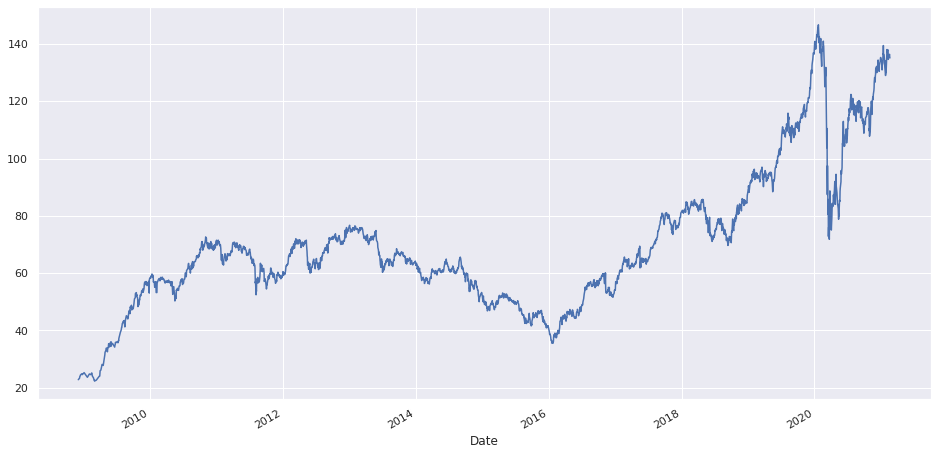

In [36]:
small11.plot();

####COMPARANDO RENDIMENTOS

**ALASKA X IP X SMALL11**

In [40]:
comparativo = pd.DataFrame()
 
data_inicio = ip.index[0]
 
comparativo['ip'] = ip/ip.loc[data_inicio]
comparativo['alaska'] = alaska/alaska.loc[data_inicio]
comparativo['small11'] = small11/small11.loc[data_inicio]

In [41]:
comparativo

,ip,alaska,small11
Date,,,
2017-06-29,1.000000,1.000000,1.000000
2017-06-30,1.007422,1.018810,1.005148
2017-07-03,1.006809,1.045057,1.012480
2017-07-04,1.006662,1.030184,1.021841
2017-07-05,1.008034,1.024059,1.019813
...,...,...,...
2021-02-09,1.910353,2.006999,2.144618
2021-02-10,1.902515,1.960630,2.100156
2021-02-11,1.912435,1.975941,2.106084


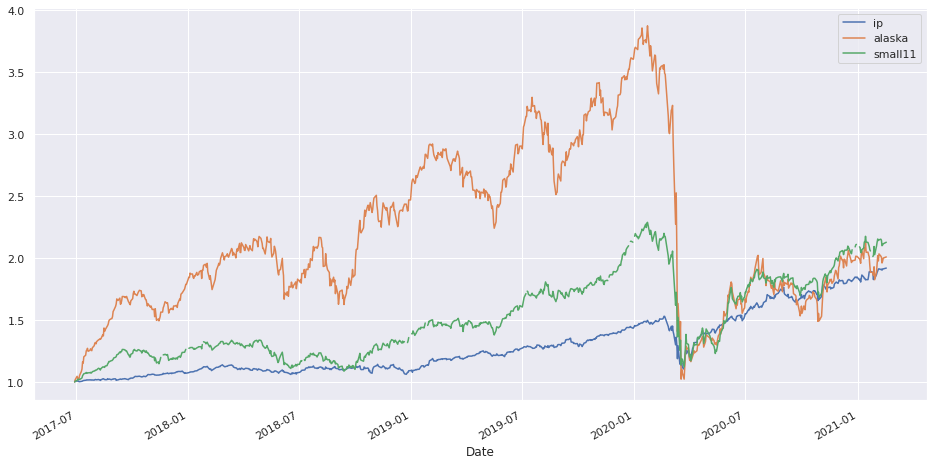

In [42]:
comparativo.plot();